In [1]:
from pathlib import Path
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from functions import conv_eng_si, pws_vw_ir, pws_vw_bcr, pws_vw_bfcr, pws_vw_bpcr, pws_vw_ira, pwd_vf_ir, pwd_vf_uf

# Path

In [3]:
cwd=Path.cwd()

# Vertical Well in infinity reservoir 

## Pressure Build-up example

Using the principle of superposition in the equation for vertical well in infinity reservoir:
$$ p_\mathrm{ws} \left(r=r_\mathrm{w}, \Delta t \right) = p_\mathrm{i} + \dfrac{q\mu B}{4\pi k h} \left[ \mathrm{Ei} \left( -\dfrac{\phi \mu c r^2}{4k \left( t + \Delta t \right)} \right) - \mathrm{Ei} \left( -\dfrac{\phi \mu c r^2}{4k \left(\Delta t \right)} \right) \right]$$ 


In [4]:
table_vw_ir_rdat=pd.read_csv(cwd/"Example_vw_ir_CB-161_rdata.csv")
table_vw_ir_build=pd.read_csv(cwd/"Example_vw_ir_CB-161_build.csv")

In [5]:
converted_values = []
converted_units = []
table_vw_ir_rdat_si=table_vw_ir_rdat.copy()

for index, row in table_vw_ir_rdat_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vw_ir_rdat_si['Value'] = converted_values
table_vw_ir_rdat_si['Unit'] = converted_units

table_vw_ir_build_si=table_vw_ir_build.copy()
table_vw_ir_build_si["delta_t"],_=conv_eng_si(table_vw_ir_build_si["delta_t"],"h")
table_vw_ir_build_si["pws"],_=conv_eng_si(table_vw_ir_build_si["pws"],"psi")

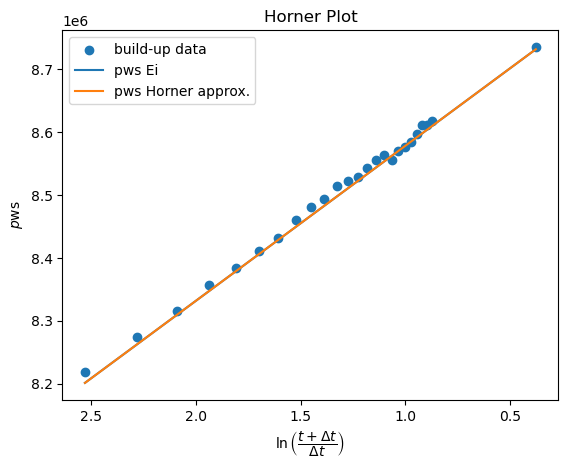

In [6]:
fig1, ax1= plt.subplots()
x_data=np.log(table_vw_ir_build_si["t_dt"])
ax1.scatter(x_data,table_vw_ir_build_si["pws"],label="build-up data")
ax1.invert_xaxis()

ax1.set_title("Horner Plot")
ax1.set_xlabel(r"$\ln \left( \dfrac{t + \Delta t}{\Delta t} \right)$")
ax1.set_ylabel("$p$ws")

k=1.57e-13

pws=pws_vw_ir(table_vw_ir_rdat_si,table_vw_ir_build_si,k)
ax1.plot(x_data,pws,label="pws Ei ")

pwsh=pws_vw_ira(table_vw_ir_rdat_si,table_vw_ir_build_si,k)
ax1.plot(x_data,pwsh,label="pws Horner approx.")

plt.legend()

plt.show()



# Vertical well in bounded circular reservoir

## Pressure Build-up example (Well A Miller et al, 1950). No flow at outer boundary

Using the principle of superposition in the equation for vertical well in infinity circular bounded with no flow equation:
$$ p_\mathrm{ws}\left( r=r_\mathrm{w}\right) = p_\mathrm{i} - \dfrac{q\mu B}{4\pi k h} \left\{ p_\mathrm{wD} \left( t + \Delta t \right) - p_\mathrm{wD} \left( \Delta t \right) \right\} $$ \
With $t$ as the producing time before shut in and $\Delta t$ the time of the shut in, and $\tau$ either $t$ or $t +\Delta t,$ and $r_\mathrm{D}= r / r_\mathrm{e}$

\begin{align*} p_\mathrm{wD} \left(  \tau \right) = \mathcal{K}  \left( \tau \right) + \mathcal{G} \left( r_\mathrm{D}\right) -4 \sum_\limits{n=1}^{\infty} \mathcal{M}_n \left( \mathcal{X}_n, r_\mathrm{D}, \tau  \right)  \end{align*} 

\begin{align*} \mathcal{K}\left(r_\mathrm{D}, \tau\right) = \dfrac{4k \left( \tau \right)}{\phi \mu c R_{\mathrm{b}}^{2}} + \dfrac{r_{\mathrm{w}}^{2}}{R_{\mathrm{b}}^{2}} \end{align*}

\begin{align*} \mathcal{G}\left( r_\mathrm{D}\right) = -2 \ln \dfrac{r_\mathrm{w}}{R_\mathrm{b} } -\frac{3}{2}\end{align*}


\begin{align*} \mathcal{M}_n \left( Bessel, r_\mathrm{D}, \tau  \right) = \dfrac{J_0 \left( \mathcal{X}_n \dfrac{r_\mathrm{w}}{R_\mathrm{b}} \right) \exp \left( -\mathcal{X}_{n}^{2} \dfrac{k \left( \tau \right)}{\phi \mu c R_{\mathrm{b}}^{2}} \right)}{ \mathcal{X}_{n}^{2} J_{0}{^2} \left( \mathcal{X}_n \right)}\end{align*}




for the finite source solution the vertical well in infinity circular bounded with no flow equation, to an arbitrary radious $r$
$$ p_\mathrm{s} = p_\mathrm{i} - \dfrac{q\mu B}{4\pi k h} \left\{ p_\mathrm{D} \left( t + \Delta t \right) - p_\mathrm{D} \left( \Delta t \right) \right\} $$ \
With $t$ as the producing time before shut in and $\Delta t$ the time of the shut in, and $\tau$ either $t$ or $t +\Delta t $, with $r_\mathrm{D}=r_\mathrm{De}=r_\mathrm{e}/r_\mathrm{w}$ and $t_\mathrm{D} \left(r=r_\mathrm{w}\right)$ in wellbore pressure.

\begin{align*} p_\mathrm{wD} \left(  \tau \right) = \mathcal{K}  \left( \tau \right) + \mathcal{G} \left( r_\mathrm{D}\right) +4 \sum_\limits{m=1}^{\infty} \mathcal{M}_m \left( \mathcal{X}_m, r_\mathrm{D}, \tau  \right)  \end{align*} 

\begin{align*} t_\mathrm{D} \left(r_\mathrm{w}, \tau \right) = \dfrac{k \tau}{ \phi \mu c r_{\mathrm{w}}^{2}}\end{align*}

\begin{align*} \mathcal{K}\left(r_\mathrm{D}, \tau\right) = 2 \left[ \dfrac{2}{ \left( r_\mathrm{D}-1 \right)} \left( t_\mathrm{D} + \frac{1}{4} \right) \right] \end{align*}

\begin{align*} \mathcal{G}\left( r_\mathrm{D}\right) = 2\left[- \dfrac{ 3 {r_\mathrm{D}}^4 -  4 {r_\mathrm{D}}^4 \ln r_\mathrm{D} -2 {r_\mathrm{D}}^2 -1 }{ 4 \left( r_\mathrm{D}-1 \right)^2 } \right] \end{align*}

\begin{align*} \mathcal{M}_m \left( Bessel, r_\mathrm{D}, \tau  \right) = \dfrac{J_{1}^{2} \left( \mathcal{X}_m r_\mathrm{D} \right) \exp \left( -\mathcal{X}_{m}^{2} t_\mathrm{D} \right)} { \mathcal{X}_{m}^{2} \left[ J_{1}^{2}  \left( \mathcal{X}_{m}^{2} r_\mathrm{D} \right) -J_{1}^{2}  \left( \mathcal{X}_{m}^{2} \right) \right] } \end{align*}



In [7]:
table_vw_bcr_rdat=pd.read_csv(cwd/"Example_vw_bcr_Well-A_rdata.csv")
table_vw_bcr_build=pd.read_csv(cwd/"Example_vw_bcr_Well-A_build.csv")

In [8]:
converted_values = []
converted_units = []
table_vw_bcr_rdat_si=table_vw_bcr_rdat.copy()

for index, row in table_vw_bcr_rdat_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vw_bcr_rdat_si['Value'] = converted_values
table_vw_bcr_rdat_si['Unit'] = converted_units

table_vw_bcr_build_si=table_vw_bcr_build.copy()
table_vw_bcr_build_si["delta_t"],_=conv_eng_si(table_vw_bcr_build_si["delta_t"],"h")
table_vw_bcr_build_si["tdt"],_=conv_eng_si(table_vw_bcr_build_si["tdt"],"h")
table_vw_bcr_build_si["pws"],_=conv_eng_si(table_vw_bcr_build_si["pws"],"psi")

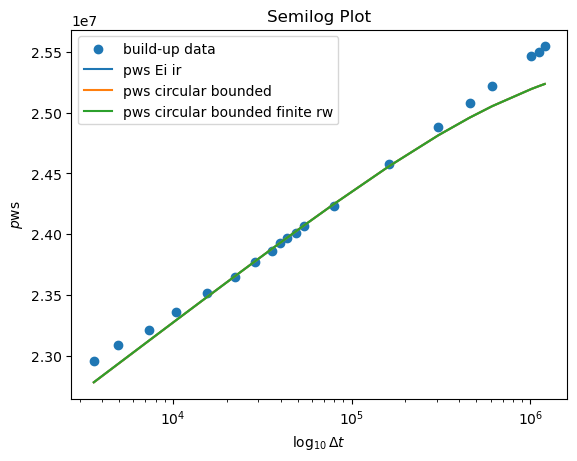

In [9]:
fig2, ax1= plt.subplots()
#x_data=table_vw_bcr_build_si["t_dt"]
x_data=table_vw_bcr_build_si["delta_t"]
ax1.scatter(x_data,table_vw_bcr_build_si["pws"],label="build-up data")
#ax1.invert_xaxis()

ax1.set_title("Semilog Plot")
#ax1.set_xlabel(r"$\ln \left( \dfrac{t + \Delta t}{\Delta t} \right)$")
ax1.set_xlabel(r"$\log_{10} \Delta t$")
ax1.set_ylabel("$p$ws")

k=5.29977651e-16
#k=1.01653069e-15
#k=2.81653069e-17


pws=pws_vw_ir(table_vw_bcr_rdat_si,table_vw_bcr_build_si,k)
ax1.plot(x_data,pws,label="pws Ei ir ")

pwsc=pws_vw_bcr(
    table_vw_bcr_rdat_si,
    table_vw_bcr_build_si,
    k=k,
    N_terms=100
)
ax1.plot(x_data,pwsc,label="pws circular bounded")

pwsc_f=pws_vw_bfcr(
    table_vw_bcr_rdat_si,
    table_vw_bcr_build_si,
    k=k,
    N_terms=100
)
ax1.plot(x_data,pwsc_f,label="pws circular bounded finite rw")

plt.legend()
ax1.set_xscale("log")
#ax1.set_yscale("log")
plt.show()

## Pressure Build-up example (Economides & Ramey, 1981). Constant pressure at outer boundary

Using the principle of superposition in the equation for vertical well in infinity circular bounded with constant pressure at outer boundary:
$$ p_\mathrm{ws}\left( r=r_\mathrm{w}\right) = p_\mathrm{i} - \dfrac{q\mu B}{4\pi k h} \left\{ p_\mathrm{wD} \left( t + \Delta t \right) - p_\mathrm{wD} \left( \Delta t \right) \right\} $$ \
With $t$ as the producing time before shut in and $\Delta t$ the time of the shut in, and $\tau$ either $t$ or $t +\Delta t,$ and with $r_\mathrm{D}=r_\mathrm{De}=r_\mathrm{e}/r_\mathrm{w}$

\begin{align*} p_\mathrm{wD} \left(  \tau \right) =  \mathcal{G} \left( r_\mathrm{D}\right) -4 \sum_\limits{m=1}^{\infty} \mathcal{M}_m \left( \mathcal{X}_m, r_\mathrm{D}, \tau  \right)  \end{align*} 

\begin{align*} t_\mathrm{D} \left(r_\mathrm{w}, \tau \right) = \dfrac{k \tau}{ \phi \mu c r_{\mathrm{w}}^{2}}\end{align*}

\begin{align*} \mathcal{G}\left( r_\mathrm{D}\right) = 2\ln r_\mathrm{D} \end{align*}

\begin{align*} \mathcal{M}_m \left( Bessel, r_\mathrm{D}, \tau  \right) = \dfrac{J_{0}^{2} \left( \mathcal{X}_m r_\mathrm{D} \right) \exp \left( -\mathcal{X}_{m}^{2} t_\mathrm{D} \right)} { \mathcal{X}_{m}^{2} \left[ J_{1}^{2}  \left( \mathcal{X}_{m}^{2} r_\mathrm{D} \right) -J_{0}^{2}  \left( \mathcal{X}_{m}^{2} \right) \right] } \end{align*}

In [10]:
table_vw_bpcr_rdat=pd.read_csv(cwd/"Example_vw_bpcr_Well-A_rdata.csv")
table_vw_bpcr_build=pd.read_csv(cwd/"Example_vw_bpcr_Well-A_build.csv")

In [11]:
converted_values = []
converted_units = []
table_vw_bpcr_rdat_si=table_vw_bpcr_rdat.copy()

for index, row in table_vw_bpcr_rdat_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vw_bpcr_rdat_si['Value'] = converted_values
table_vw_bpcr_rdat_si['Unit'] = converted_units

table_vw_bpcr_build_si=table_vw_bpcr_build.copy()
table_vw_bpcr_build_si["delta_t"],_=conv_eng_si(table_vw_bpcr_build_si["delta_t"],"h")
#table_vw_bpcr_build_si["tdt"],_=conv_eng_si(table_vw_bpcr_build_si["tdt"],"h")
table_vw_bpcr_build_si["pws"],_=conv_eng_si(table_vw_bpcr_build_si["pws"],"psi")

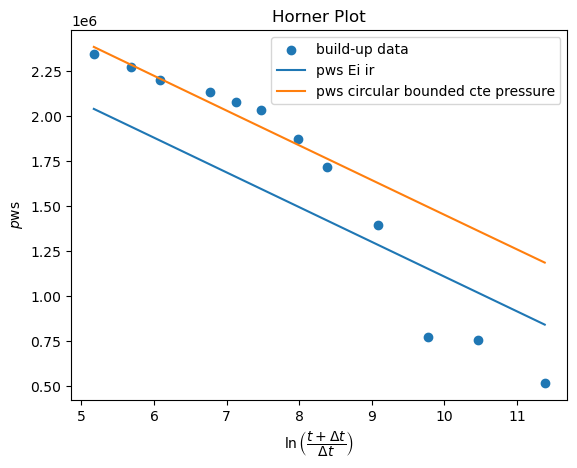

In [12]:
fig3, ax1= plt.subplots()
x_data=np.log(table_vw_bpcr_build_si["t_dt"])
#x_data=table_vw_bpcr_build_si["delta_t"]
#x_data=table_vw_bpcr_build_si["t_dt"]
ax1.scatter(x_data,table_vw_bpcr_build_si["pws"],label="build-up data")
#ax1.invert_xaxis()

ax1.set_title("Horner Plot")
ax1.set_xlabel(r"$\ln \left( \dfrac{t + \Delta t}{\Delta t} \right)$")
ax1.set_ylabel("$p$ws")


k=4.4e-13 #more than 600% because q average
#k=9.129037749999999e-14

pws=pws_vw_ir(table_vw_bpcr_rdat_si,table_vw_bpcr_build_si,k)
ax1.plot(x_data,pws,label="pws Ei ir ")

pwspc=pws_vw_bpcr(
    table_vw_bpcr_rdat_si,
    table_vw_bpcr_build_si,
    k=k,
    N_terms=1000
)
ax1.plot(x_data,pwspc,label="pws circular bounded cte pressure")

plt.legend()
#ax1.set_xscale("log")
#ax1.set_yscale("log")
plt.show()

# Vertical Fracture with Infinite Conductivity

In [13]:
table_vf_ic_rp=pd.read_csv(cwd/"Example_vf_ic_t1_rp.csv")
table_vf_ic_rd=pd.read_csv(cwd/"Example_vf_ic_t1_rd.csv")

## Graph

In [14]:
from scipy import special as sc
import matplotlib.ticker as ticker

In [15]:
test=pd.read_csv(cwd/"td_pd.csv",sep=";",decimal=",")

In [16]:
td=np.logspace(-2,4)
pwd=np.sqrt(np.pi*td)*sc.erf(1/(2*np.sqrt(td))) - 0.5*sc.expi(-1/(4*td))
td=np.log10(td)
pwd=np.log10(pwd)

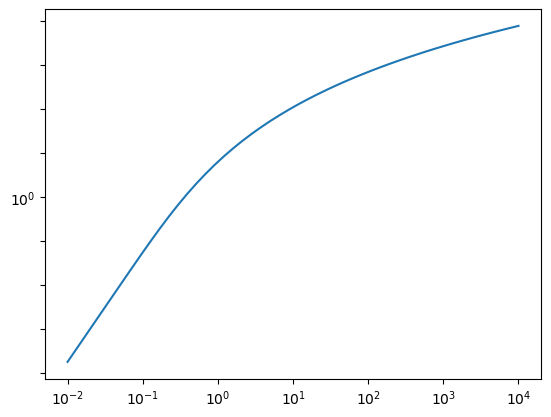

In [17]:
def log_tick_formatter(x, pos):
    if x == int(x):
        return f'$10^{{{int(x)}}}$'
    else:
        # Return empty string or a rounded float for minor marks, depending on preference
        return '' 
        # Or: return f'$10^{{{x:.1f}}}$'
fig=plt.subplot()
fig.plot(td,pwd)
fig.xaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))
fig.yaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))
plt.pause(1)

In [18]:
td=test["td"]
pwd=0.5*np.sqrt(np.pi*td)*( sc.erf(0.134/np.sqrt(td)) + sc.erf(0.866/np.sqrt(td))  ) - 0.067*sc.expi(-0.018/(td)) - 0.433*sc.expi(-0.750/(td))


### Converting values

Convert values when intial values are in US-Eng system of units

In [19]:
converted_values = []
converted_units = []
table_vf_ic_rp_si=table_vf_ic_rp.copy()

for index, row in table_vf_ic_rp_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vf_ic_rp_si['Value'] = converted_values
table_vf_ic_rp_si['Unit'] = converted_units

table_vf_ic_rd_si=table_vf_ic_rd.copy()
table_vf_ic_rd_si["delta_t"],_=conv_eng_si(table_vf_ic_rd_si["delta_t"],"h")
table_vf_ic_rd_si["pws_pwf"],_=conv_eng_si(table_vf_ic_rd_si["pws_pwf"],"psi")
table_vf_ic_rd_si["pws"],_=conv_eng_si(table_vf_ic_rd_si["pws"],"psi")

In [20]:
##SI
for i in range(len(b)):
    plt.plot(d[i],c)
plt.xscale("log")
plt.yscale("log")
plt.pause(1)

NameError: name 'b' is not defined